In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
%cd drive/MyDrive
%ls

/content/drive/MyDrive
 arima_hyperband/                Isro_PPT.pptx                          rice.csv
 Attendance_System.v1i.yolov8/  'Isro Project.v2i.coco-segmentation'/   rice.pkl
'Colab Notebooks'/              'Isro Project.v2i.png-mask-semantic'/   test.pkl
'Idea Sheet.gdoc'                MsAccountRecCode.pdf


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

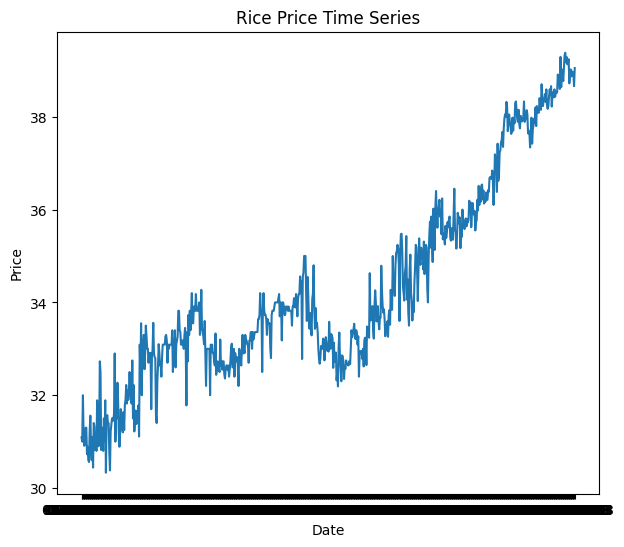

ADF Statistic: 0.161097
p-value: 0.969993
Data is not stationary. Applying differencing...


In [ ]:
# Load your data into a pandas dataframe
df = pd.read_csv('rice.csv', index_col='Date', parse_dates=['Date'])

# Plot the time series to visualize the data
plt.figure(figsize=(7,6))
plt.plot(df.index, df['Rice'])
plt.title('Rice Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Check if the data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Rice'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Make the data stationary if necessary
if result[1] > 0.05:
    print("Data is not stationary. Applying differencing...")
    df_diff = df.diff().dropna()
else:
    print("Data is stationary. No differencing needed.")
    df_diff = df

# Reset the index of the dataframe
df_diff.reset_index(inplace=True)

# Split the data into training and testing sets
train_data=df.iloc[:-7]
test_data=df.iloc[-7:]

# Plot the autocorrelation and partial autocorrelation functions to determine the order of the ARIMA model



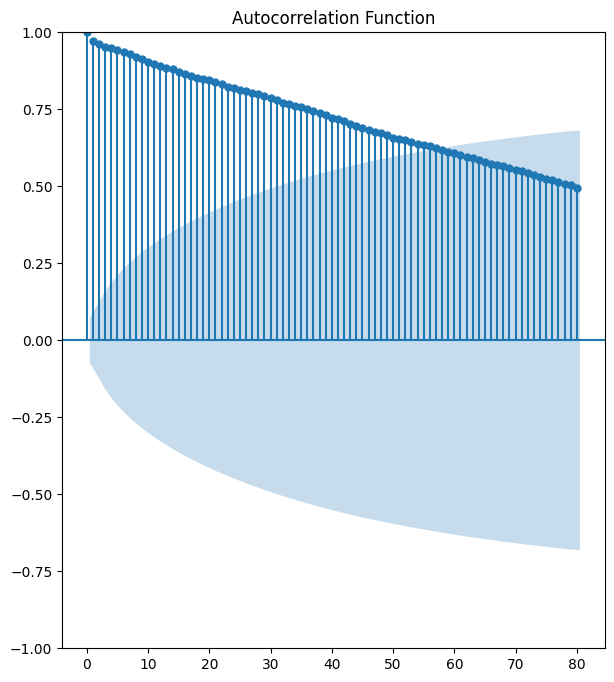

In [ ]:
# Set figure size
fig, ax = plt.subplots(figsize=(7,8))

# Plot the Autocorrelation Function (ACF)
plot_acf(train_data['Rice'], ax=ax, lags=80)

# Set title
ax.set_title('Autocorrelation Function')

# Show plot
plt.show()

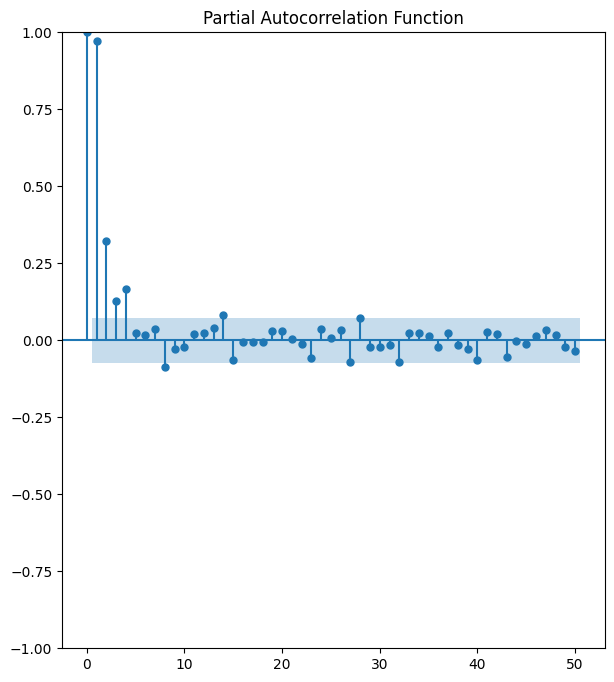

In [ ]:
# Set figure size
fig, ax = plt.subplots(figsize=(7,8))

# Plot the Autocorrelation Function (ACF)
plot_pacf(train_data['Rice'], ax=ax, lags=50)

# Set title
ax.set_title('Partial Autocorrelation Function')

# Show plot
plt.show()

In [ ]:



# Fit the ARIMA model
model = sm.tsa.ARIMA(train_data['Rice'], order=(30,3,4))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [ ]:
print (test_data)

             Rice
Date             
25-12-2023  39.02
26-12-2023  38.87
27-12-2023  38.98
28-12-2023  38.96
29-12-2023  38.92
30-12-2023  38.66
31-12-2023  39.05


In [ ]:
# Forecast the future prices
forecast = results.forecast(steps=7)
forecast = forecast.reset_index(drop=False)
forecast=np.array(forecast)
#forecast= forecast.drop(forecast , 0 ,axis = 1)
print(forecast)

[[723.          38.98878202]
 [724.          39.11862619]
 [725.          39.04504636]
 [726.          39.02765152]
 [727.          39.07365081]
 [728.          39.04592883]
 [729.          39.17178419]]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
forecast = np.delete(forecast, 0, axis=1)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_data, marker='o', linestyle='-', color='b', label='Actual Price')
plt.plot(forecast, marker='o', linestyle='-', color='r', label='Forecasted Price')
# Setting limits to reduce zoom factor





# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Chart of Two Arrays')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
def rmse(a, b):
    """
    Calculate the Root Mean Squared Error (RMSE) between two pandas Series.

    Parameters:
    a (pd.Series): First series
    b (pd.Series): Second series

    Returns:
    float: RMSE value
    """
    if len(a) != len(b):
        raise ValueError("Both series must have the same length")

    return np.sqrt(np.mean((a - b) ** 2))

In [ ]:
print(rmse(forecast,test_data))

0.1931174964522062


In [ ]:
import pickle

In [ ]:
pickle_out = open("test.pkl" , "wb")
pickle.dump(results , pickle_out)
pickle_out.close()